<a href="https://colab.research.google.com/github/uccaoeo/Kaggle-Learning/blob/main/Prostate_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from google.colab import files
import io
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy

#Suppressing all warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [7]:
uploaded = files.upload()

Saving Prostate_Cancer.csv to Prostate_Cancer.csv


In [8]:
cf= pd.read_csv(io.BytesIO(uploaded['Prostate_Cancer.csv']))

In [9]:
df = cf.copy()

In [10]:
df.head()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.14,0.28,0.24,0.08
1,2,B,9,13,133,1326,0.14,0.08,0.18,0.06
2,3,M,21,27,130,1203,0.12,0.16,0.21,0.06
3,4,M,14,16,78,386,0.07,0.28,0.26,0.10
4,5,M,9,19,135,1297,0.14,0.13,0.18,0.06


In [14]:
df.drop(['id'], axis=1, inplace=True)

KeyError: ignored

In [15]:
df

,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,M,23,12,151,954,0.14,0.28,0.24,0.08
1,B,9,13,133,1326,0.14,0.08,0.18,0.06
2,M,21,27,130,1203,0.12,0.16,0.21,0.06
3,M,14,16,78,386,0.07,0.28,0.26,0.10
4,M,9,19,135,1297,0.14,0.13,0.18,0.06
...,...,...,...,...,...,...,...,...,...
95,M,23,16,132,1264,0.09,0.13,0.21,0.06
96,B,22,14,78,451,0.10,0.07,0.19,0.07
97,B,19,27,62,295,0.10,0.05,0.14,0.07
98,B,21,24,74,413,0.09,0.07,0.16,0.07


In [16]:
df.diagnosis_result = [1 if each == "M" else 0 for each in df.diagnosis_result]

In [17]:
y = df.diagnosis_result.values
x_data = df.drop(['diagnosis_result'], axis=1)

In [18]:
x = (x_data -np.min(x_data))/(np.max(x_data)-np.min(x_data)).values

In [19]:
x.head()

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,0.88,0.06,0.82,0.45,1.00,0.78,0.63,0.59
1,0.00,0.12,0.68,0.67,1.00,0.13,0.27,0.09
2,0.75,1.00,0.65,0.60,0.75,0.40,0.43,0.16
3,0.31,0.31,0.22,0.11,0.00,0.80,0.74,1.00
4,0.00,0.50,0.69,0.65,0.97,0.31,0.27,0.14


In [23]:
y

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1])

In [20]:
# %%train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (8, 85)
x test:  (8, 15)
y train:  (85,)
y test:  (15,)


###Logistic Regression

In [21]:
# sklearn
from sklearn import linear_model
logreg = linear_model.LogisticRegression(random_state = 42,max_iter= 350)
print("test accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_test.T, y_test.T)))
print("train accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)))


test accuracy: 0.9333333333333333 
train accuracy: 0.8705882352941177 


Linear Regression Success Rate : 93.33%


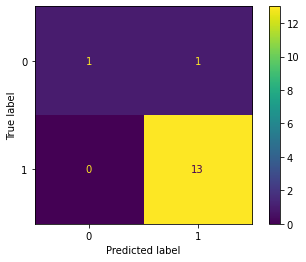

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, plot_confusion_matrix
lr=LogisticRegression(max_iter=10000)
lr.fit(x_train.T,y_train.T)
p1=lr.predict(x_test.T)
s1=accuracy_score(y_test.T,p1)
print("Linear Regression Success Rate :", "{:.2f}%".format(100*s1))
plot_confusion_matrix(lr, x_test.T, y_test.T)
plt.show()

###Gradient Booster Classifier

Gradient Booster Classifier Success Rate : 93.33%


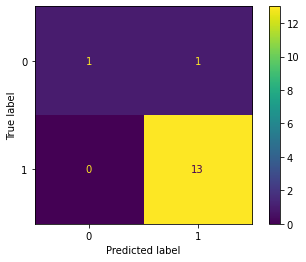

In [26]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(x_train.T,y_train.T)
p2=gbc.predict(x_test.T)
s2=accuracy_score(y_test.T,p2)
print("Gradient Booster Classifier Success Rate :", "{:.2f}%".format(100*s2))
plot_confusion_matrix(gbc, x_test.T, y_test.T)
plt.show()

###Random Forest Classifier

Random Forest Classifier Success Rate : 80.00%


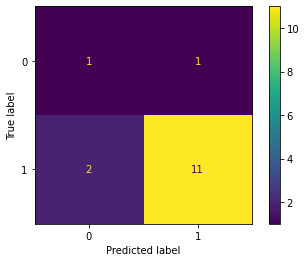

In [29]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train.T,y_train.T)
p3=rfc.predict(x_test.T)
s3=accuracy_score(y_test.T,p3)
print("Random Forest Classifier Success Rate :", "{:.2f}%".format(100*s3))
plot_confusion_matrix(rfc, x_test.T, y_test.T)
plt.show()

###Support Vector Machine

Support Vector Machine Success Rate : 86.67%


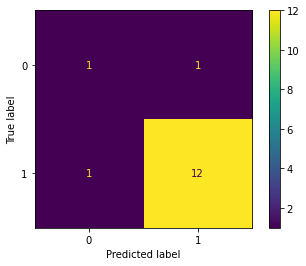

In [30]:


from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train.T,y_train.T)
p4=svm.predict(x_test.T)
s4=accuracy_score(y_test.T,p4)
print("Support Vector Machine Success Rate :", "{:.2f}%".format(100*s4))
plot_confusion_matrix(svm, x_test.T, y_test.T)
plt.show()

###K Nearest Neighbors

K Nearest Neighbors Top 5 Success Rates:
[93.33, 93.33, 86.67, 86.67, 86.67]


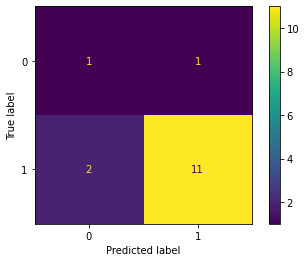

In [31]:
from sklearn.neighbors import KNeighborsClassifier
scorelist=[]
for i in range(1,21):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train.T,y_train.T)
    p5=knn.predict(x_test.T)
    s5=accuracy_score(y_test.T,p5)
    scorelist.append(round(100*s5, 2))
print("K Nearest Neighbors Top 5 Success Rates:")
print(sorted(scorelist,reverse=True)[:5])
plot_confusion_matrix(knn, x_test.T, y_test.T)
plt.show()

###Decision Tree Classifier

Decision Tree Classifier Top 5 Success Rates:
[86.67, 80.0, 80.0, 80.0, 80.0]


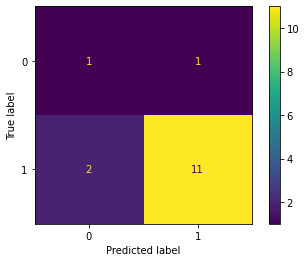

In [32]:
from sklearn.tree import DecisionTreeClassifier
list1 = []
for leaves in range(2,10):
    classifier = DecisionTreeClassifier(max_leaf_nodes = leaves, random_state=0, criterion='entropy')
    classifier.fit(x_train.T, y_train.T)
    y_pred = classifier.predict(x_test.T)
    list1.append(accuracy_score(y_test.T,y_pred)*100)
print("Decision Tree Classifier Top 5 Success Rates:")
print([round(i, 2) for i in sorted(list1, reverse=True)[:5]])
plot_confusion_matrix(classifier, x_test.T, y_test.T)
plt.show()

###Extra Gradient Booster Classifier

In [33]:
from xgboost import XGBClassifier
#from bayes_opt import BayesianOptimization
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold, GridSearchCV

params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

xgb = XGBClassifier(learning_rate=0.01, n_estimators=1000, objective='binary:logistic')

skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 0)

grid = GridSearchCV(estimator=xgb, param_grid=params, n_jobs=4, 
                    cv=skf.split(x_train.T,y_train.T), verbose=0 )

grid.fit(x_train.T,y_train.T,early_stopping_rounds=30,eval_set=[(x_test.T, y_test.T)])
p2x = grid.best_estimator_.predict(x_test.T)
s2x=accuracy_score(y_test.T,p2x)

[0]	validation_0-error:0.133333
Will train until validation_0-error hasn't improved in 30 rounds.
[1]	validation_0-error:0.133333
[2]	validation_0-error:0.133333
[3]	validation_0-error:0.2
[4]	validation_0-error:0.133333
[5]	validation_0-error:0.2
[6]	validation_0-error:0.2
[7]	validation_0-error:0.2
[8]	validation_0-error:0.2
[9]	validation_0-error:0.2
[10]	validation_0-error:0.2
[11]	validation_0-error:0.2
[12]	validation_0-error:0.133333
[13]	validation_0-error:0.2
[14]	validation_0-error:0.2
[15]	validation_0-error:0.2
[16]	validation_0-error:0.2
[17]	validation_0-error:0.2
[18]	validation_0-error:0.2
[19]	validation_0-error:0.2
[20]	validation_0-error:0.2
[21]	validation_0-error:0.2
[22]	validation_0-error:0.2
[23]	validation_0-error:0.2
[24]	validation_0-error:0.2
[25]	validation_0-error:0.2
[26]	validation_0-error:0.2
[27]	validation_0-error:0.2
[28]	validation_0-error:0.2
[29]	validation_0-error:0.2
[30]	validation_0-error:0.2
Stopping. Best iteration:
[0]	validation_0-error:0.

Extra Gradient Booster Classifier Success Rate : 86.67%


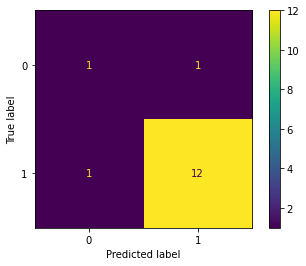

In [35]:
print("Extra Gradient Booster Classifier Success Rate :", "{:.2f}%".format(100*s2x))
plot_confusion_matrix(grid.best_estimator_, x_test.T, y_test.T)
plt.show()

In [36]:
print(f'Gradient Booster Classifier: {round(100*s2, 2)}%\n \
Decision Tree Classifier: {round(sorted(list1, reverse=True)[0], 2)}%\n \
Logistic Regression: {round(100*s1, 2)}%\n \
Support Vector Machine: {round(100*s4, 2)}%\n \
Random Forest Classifier: {round(100*s3, 2)}%\n \
K Nearest Neighbors: {round(sorted(scorelist,reverse=True)[0], 2)}%\n \
Extra Gradient Booster Classifier: {round(100*s2x, 2)}%')

Gradient Booster Classifier: 93.33%
 Decision Tree Classifier: 86.67%
 Logistic Regression: 93.33%
 Support Vector Machine: 86.67%
 Random Forest Classifier: 80.0%
 K Nearest Neighbors: 93.33%
 Extra Gradient Booster Classifier: 86.67%
